<a href="https://colab.research.google.com/github/mc-ivan/mod9-mod-math-micro-avanzada/blob/main/notebook/Analisis_MICMAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# =========================================
# ANÁLISIS MICMAC - ECONOMÍA BOLIVIANA
# =========================================

***Maestría en Ingeniería Matemática***

MOD9-MODELOS MATEMATICOS EN MICROECONOMIA AVANZADA

**Grupo:**
- Gimena Javier Vargas
- Christian Giovanni Ortiz
- Ivan Mamani Condori

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------
# 1. Definición de variables del sistema
# -----------------------------------------

variables = [
    "Tipo de cambio",
    "Política monetaria",
    "Mercado de divisas",
    "Inflación",
    "Balanza comercial",
    "PIB",
    "Expectativas",
    "Shocks externos"
]

# -----------------------------------------
# 2. Matriz de influencias directas
# Escala: 0 = nula, 1 = débil, 2 = media, 3 = fuerte
# -----------------------------------------

M = np.array([
    [0, 2, 3, 2, 2, 1, 3, 1],  # Tipo de cambio
    [2, 0, 3, 3, 1, 2, 2, 1],  # Política monetaria
    [3, 2, 0, 2, 2, 2, 3, 1],  # Mercado de divisas
    [1, 2, 1, 0, 1, 2, 2, 0],  # Inflación
    [2, 1, 2, 1, 0, 2, 1, 2],  # Balanza comercial
    [0, 1, 1, 2, 2, 0, 2, 0],  # PIB
    [2, 2, 2, 2, 1, 2, 0, 1],  # Expectativas
    [3, 1, 2, 1, 3, 1, 2, 0]   # Shocks externos
])

df_M = pd.DataFrame(M, index=variables, columns=variables)
df_M


,Tipo de cambio,Política monetaria,Mercado de divisas,Inflación,Balanza comercial,PIB,Expectativas,Shocks externos
Tipo de cambio,0,2,3,2,2,1,3,1
Política monetaria,2,0,3,3,1,2,2,1
Mercado de divisas,3,2,0,2,2,2,3,1
Inflación,1,2,1,0,1,2,2,0
Balanza comercial,2,1,2,1,0,2,1,2
PIB,0,1,1,2,2,0,2,0
Expectativas,2,2,2,2,1,2,0,1
Shocks externos,3,1,2,1,3,1,2,0


## Cálculo de influencias directas

In [2]:
# Influencia directa (motricidad)
influencia_directa = M.sum(axis=1)

# Dependencia directa
dependencia_directa = M.sum(axis=0)

df_directa = pd.DataFrame({
    "Influencia directa": influencia_directa,
    "Dependencia directa": dependencia_directa
}, index=variables)

df_directa


,Influencia directa,Dependencia directa
Tipo de cambio,14,13
Política monetaria,14,11
Mercado de divisas,15,14
Inflación,9,13
Balanza comercial,11,12
PIB,8,12
Expectativas,12,15
Shocks externos,13,6


## Cálculo de influencias indirectas (MICMAC)

In [3]:
# Potenciación de la matriz para influencias indirectas
M2 = np.linalg.matrix_power(M, 2)
M3 = np.linalg.matrix_power(M, 3)

# Influencia y dependencia indirecta
influencia_indirecta = M2.sum(axis=1) + M3.sum(axis=1)
dependencia_indirecta = M2.sum(axis=0) + M3.sum(axis=0)

df_indirecta = pd.DataFrame({
    "Influencia indirecta": influencia_indirecta,
    "Dependencia indirecta": dependencia_indirecta
}, index=variables)

df_indirecta


,Influencia indirecta,Dependencia indirecta
Tipo de cambio,2194,1932
Política monetaria,2122,1797
Mercado de divisas,2277,2116
Inflación,1390,2067
Balanza comercial,1747,1764
PIB,1206,1923
Expectativas,1859,2298
Shocks externos,2078,976


## Gráfico Motricidad–Dependencia

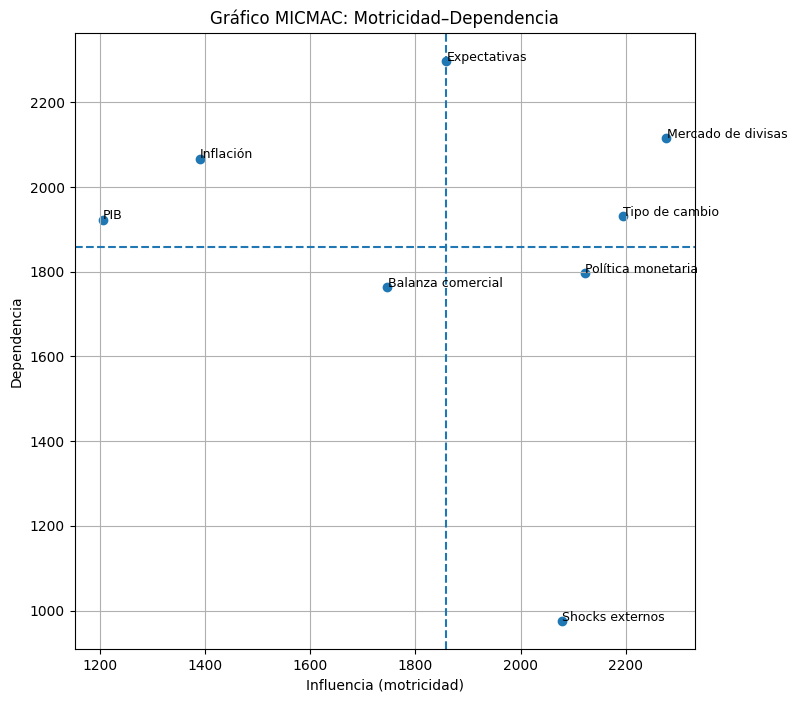

In [4]:
plt.figure(figsize=(8, 8))
plt.scatter(influencia_indirecta, dependencia_indirecta)

for i, var in enumerate(variables):
    plt.text(influencia_indirecta[i] + 0.5,
             dependencia_indirecta[i] + 0.5,
             var, fontsize=9)

plt.axhline(np.mean(dependencia_indirecta), linestyle='--')
plt.axvline(np.mean(influencia_indirecta), linestyle='--')

plt.xlabel("Influencia (motricidad)")
plt.ylabel("Dependencia")
plt.title("Gráfico MICMAC: Motricidad–Dependencia")
plt.grid(True)
plt.show()
